## **Proyecto de Análisis de Datos de Recursos Humanos**

### **Objetivo del Proyecto**
El objetivo de este proyecto es analizar un conjunto de datos de Recursos Humanos para identificar patrones y factores que influyen en el salario de los empleados y predecir su riesgo de renuncia. Se busca optimizar la gestión de talento y mejorar la satisfacción laboral.


## **!pip install**
Instalamos o actualizamos diferentes bibliotecas de Python, útiles para la manipulación de datos, visualización, análisis estadístico y gestión de archivos.

In [22]:
# Openpyxl permite leer y escribir archivos de Excel en formato .xlsx.
!pip install pandas openpyxl

# Proporcionamos una interfaz de alto nivel para crear visualizaciones estadísticas atractivas y fáciles de interpretar.
!pip install pandas openpyxl seaborn matplotlib

# Generamos un informe de perfil detallado de un conjunto de datos, como la distribución, las correlaciones y otros aspectos.
!pip install ydata-profiling

# enfocado en el rendimiento y la eficiencia, permite interoperar con Pandas, manejar datos en formato Parquet y convertir archivos Excel a CSV.
!pip install --upgrade 'polars[pandas,pyarrow,xlsx2csv]'

# Actualizamos la librería ipykernel a la última versión mejorando rendimiento y compatibilidad.
!pip install --upgrade ipykernel

# Para modelado predictivo, algoritmos de clasificación, regresión y agrupamiento, validación y preprocesamiento de datos.
!pip install scikit-learn

# Para estimar modelos estadísticos, realizar pruebas estadísticas y explorar datos. Análisis de series temporales y modelos lineales.
!pip install statsmodels

# Interactuamos con Google Drive, permitiendo subir, descargar o gestionar archivos en la nube.
!pip install --upgrade pydrive

# Generamos un informe sobre el entorno de trabajo actual, versiones de las bibliotecas instaladas y la configuración del sistema.
!pip install session-info

## **Imports LibreriaS varias**
Pandas, Numpy y Matplolib, entre otras.

In [23]:
# Libreria de Algebra Lineal (Vectores y Matrices).
import numpy as np

# Librería de manipulación y análisis de datos estructurados, carga, limpieza, transformación y análisis de datos en forma de DataFrames.
import pandas as pd

# Optimiza el rendimiento en el manejo de grandes volúmenes de datos de manera eficiente.
import polars as pl

# Visualizacion de gráficos.
import matplotlib.pyplot as plt # Gráficos científicos y personalizados en 2D y 3D.
from matplotlib import style # Permite cambiar el estilo de los gráficos y su apariencia.
import seaborn as sns # Visualizaciones estadísticas atractivas y de alto nivel, y su análisis exploratorio.
from scipy import stats # Realiza pruebas e inferencias estadísticas y análisis de distribuciones.
import plotly.express as px # Creación y visualizacion de gráficos interactivos, dinámicos y atractivos.
import session_info # Genera un informe sobre el entorno de trabajo actual, versiones de bibliotecas y configuraciones.


# Preprocesado y modelado
from scipy.stats import pearsonr # Calcula el coeficiente de correlación de Pearson, evalua la relación lineal entre dos variables.
from sklearn.impute import SimpleImputer # Clase que completa datos faltantes mediante imputación.
from sklearn.model_selection import train_test_split # Función para dividir y validar un conjunto de datos en conjuntos de entrenamiento y prueba de modelos.
from sklearn.preprocessing import StandardScaler # Importamos StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression # Modelos de regresión y clasificación.
from sklearn.metrics import confusion_matrix, classification_report # Evalua el rendimiento de modelos de clasificación mediante métricas como precisión, recall y F1-score.
from sklearn.linear_model import LinearRegression # Clase para modelar relaciones continuas.
from sklearn.linear_model import LogisticRegression # Clase para problemas de clasificación binaria.
from sklearn.metrics import classification_report, confusion_matrix # Evalua el rendimiento de modelos de clasificación mediante métricas como precisión, recall y F1-score.
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score # Evalua el rendimiento de modelos de clasificación mediante métricas como precisión, recall y F1-score.
from sklearn.metrics import root_mean_squared_error # Evalua modelos de regresión, por métricas sobre el error y la calidad del ajuste.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Evalua modelos de regresión, por métricas sobre el error y la calidad del ajuste.
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm # estima modelos estadísticos y realiza pruebas de hipótesis.
import statsmodels.formula.api as smf # Facilita la creación de modelos estadísticos utilizando fórmulas, similar a R.
from statsmodels.stats.anova import anova_lm # realiza análisis de varianza (ANOVA), útil para comparar medias de diferentes grupos.
from ydata_profiling import ProfileReport # generar informes de perfil y características de los datos de manera detallada.


# Configuración matplotlib
plt.style.use('ggplot') # formato de gráficos similar al de ggplot en R, mejorando la presentación visual.

plt.show() # Muestra todos los gráficos generados e interactivo o script.


## **Configuración Warnings**

In [24]:
# Algunos de los datos son inventados para evitar los warnings por divisiones por cero
# o valores igual a infinito, entonces apagamos los warnings

import warnings
warnings.simplefilter('ignore')
# warnings.filterwarnings('ignore')

## **Carga del dataset .xlsx**

In [25]:
# Cargamos el archivo en un DataFrame, Lectura del archivo
dataset = 'https://raw.githubusercontent.com/DataMinds-ISPC-2024/DataMinds-ISPC/6a9b8b6ad17f800eebeaeeba2468810a43972316/Datos/DataSetTablaRRHH.xlsx'
# URL que apunta al contenido del archivo CSV sin procesar

# Lee el archivo CSV desde la URL
dataset = pd.read_excel(dataset, engine='openpyxl')

# Muestra el DataFrame
dataset

,Número de empleado,Edad,Renunció,Frecuencia de viajes de trabajo,Departamento,Distancia a casa (km),Nivel de educación,Campo de estudio,Satisfacción ambiental laboral,Género,...,Porcentaje de aumento de salario,Satisfacción con las relaciones laborales,Horas trabajadas,Total de años trabajados,N° de capacitaciones del ultimo año,Antigüedad en la empresa,Años en el mismo puesto,Años desde el último ascenso,Años con el mismo gerente,Salario
0,1,41,1,2,Ventas,1,2,Ciencias de la Vida,2,1,...,11,1,80,8,0,6,4,0,5,1318509.614
1,2,49,2,1,Investigación y Desarrollo,8,1,Ciencias de la Vida,3,0,...,23,4,80,10,3,10,7,1,7,2454196.800
2,4,37,1,2,Investigación y Desarrollo,2,2,Otro,4,0,...,15,2,80,7,3,0,0,0,0,743696.000
3,5,33,2,1,Investigación y Desarrollo,3,4,Ciencias de la Vida,4,1,...,11,3,80,8,3,8,7,3,0,1398148.480
4,7,27,2,2,Investigación y Desarrollo,2,1,Medicina,1,0,...,12,4,80,6,3,2,2,2,2,922183.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,2,1,Investigación y Desarrollo,23,2,Medicina,3,0,...,17,3,80,17,3,5,2,0,3,1375837.600
1466,2062,39,2,2,Investigación y Desarrollo,6,1,Medicina,4,0,...,15,1,80,9,5,7,7,1,7,1524576.800
1467,2064,27,2,2,Investigación y Desarrollo,4,3,Ciencias de la Vida,2,0,...,20,2,80,6,0,6,2,0,3,1997656.848
1468,2065,49,2,1,Ventas,2,3,Medicina,4,0,...,14,4,80,17,3,9,6,0,8,1795079.354


### ***Detalles de las variables del dataset***

*   **Renunció**
   * 1= Sí
   * 2= No

*   **Frecuencia de viajes de trabajo**
   * 1= Viaja frecuentemente
   * 2= Rara vez viaja
   * 3= No viaja

*   **Nivel de educación**
   * 1=
   * 2=
   * 3=
   * 4=
   * 5=

*   **Satisfacción ambiental laboral**
   * 1=
   * 2=
   * 3=
   * 4=
   * 5=

*   **Género**
   * 0= Masculino
   * 1= Femenino

*   **Satisfacción con el trabajo**
   * 1=
   * 2=
   * 3=
   * 4=

*   **Estado civil**
   * 1= Soltero
   * 2= Casado
   * 3= Separado
   * 4= Divorciado
   * 5= Viudo

*   **Satisfacción con las relaciones laborales**
   * 1=
   * 2=
   * 3=
   * 4=



---

# ***------ Análisis Exploratorio de Datos (EDA) ------***
Para cualquier análisis exploratorio y posterior modelado.



## 1. **Analizamos la Distribución de Salarios para entender su tendencia central y dispersión**:
   - Se utiliza un histograma con una curva de densidad (KDE) para visualizar la distribución de salarios.
   - Se añaden líneas verticales para la media y la mediana.


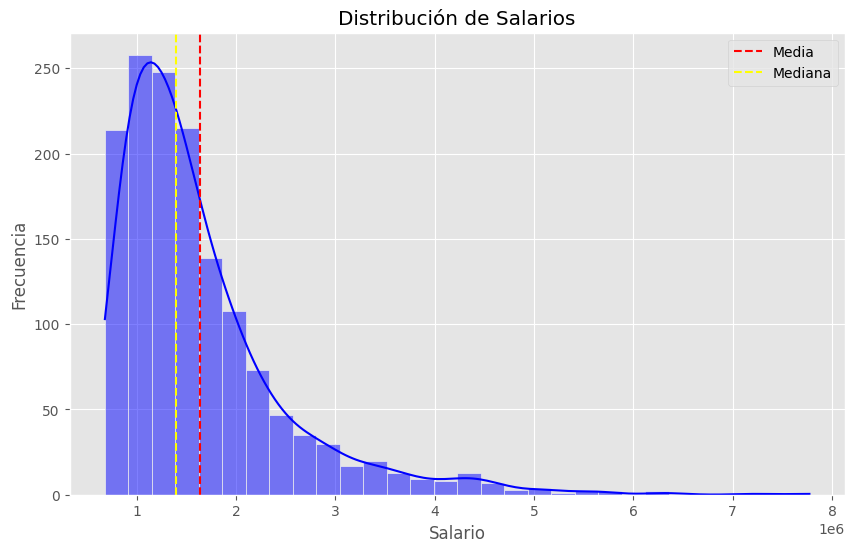

In [26]:
# Distribución de Salarios
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Salario'], bins=30, kde=True, color='blue')
plt.title('Distribución de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.axvline(dataset['Salario'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(dataset['Salario'].median(), color='yellow', linestyle='--', label='Mediana')
plt.legend()
plt.show()

## 2. **Profundizamos en las Correlaciones observadas, especialmente entre el salario, la antigüedad en la empresa y los años en el mismo puesto**:
   - Se crea una matriz de correlación solo con las variables relevantes: `Salario`, `Antigüedad en la empresa` y `Años en el mismo puesto`.
   - Se utiliza un mapa de calor para visualizar la correlación.


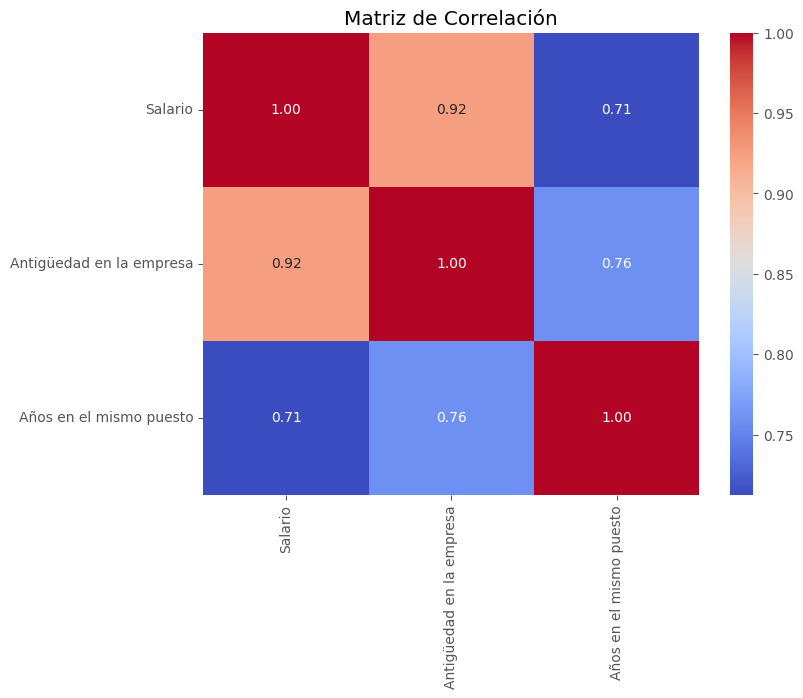

In [27]:
# Correlaciones
correlation_matrix = dataset[['Salario', 'Antigüedad en la empresa', 'Años en el mismo puesto']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

## 3. **Análisamos e Investigamos cómo la Satisfacción con el trabajo y las relaciones laborales afectan el salario y la probabilidad de renuncia**:
   - Se crean dos gráficos de caja (boxplots) para analizar cómo la satisfacción con el trabajo y las relaciones laborales afectan al salario.

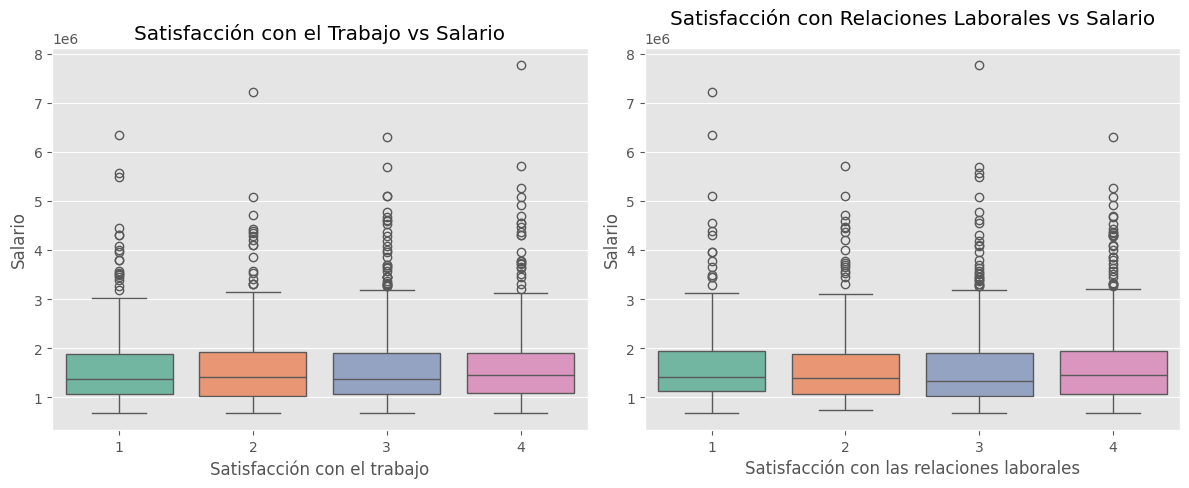

In [28]:
# 3. Análisis de la Satisfacción Laboral
plt.figure(figsize=(12, 5))

# Satisfacción con el trabajo
plt.subplot(1, 2, 1)
sns.boxplot(x='Satisfacción con el trabajo', y='Salario', data=dataset, palette='Set2')
plt.title('Satisfacción con el Trabajo vs Salario')

# Satisfacción con las relaciones laborales
plt.subplot(1, 2, 2)
sns.boxplot(x='Satisfacción con las relaciones laborales', y='Salario', data=dataset, palette='Set2')
plt.title('Satisfacción con Relaciones Laborales vs Salario')

plt.tight_layout()
plt.show()

## 4. **Evaluamos el Impacto o efecto del nivel de Educación y el número de Capacitaciones en el salario**:
   - Se crean boxplots para evaluar el impacto del nivel educativo y el número de capacitaciones en el salario.

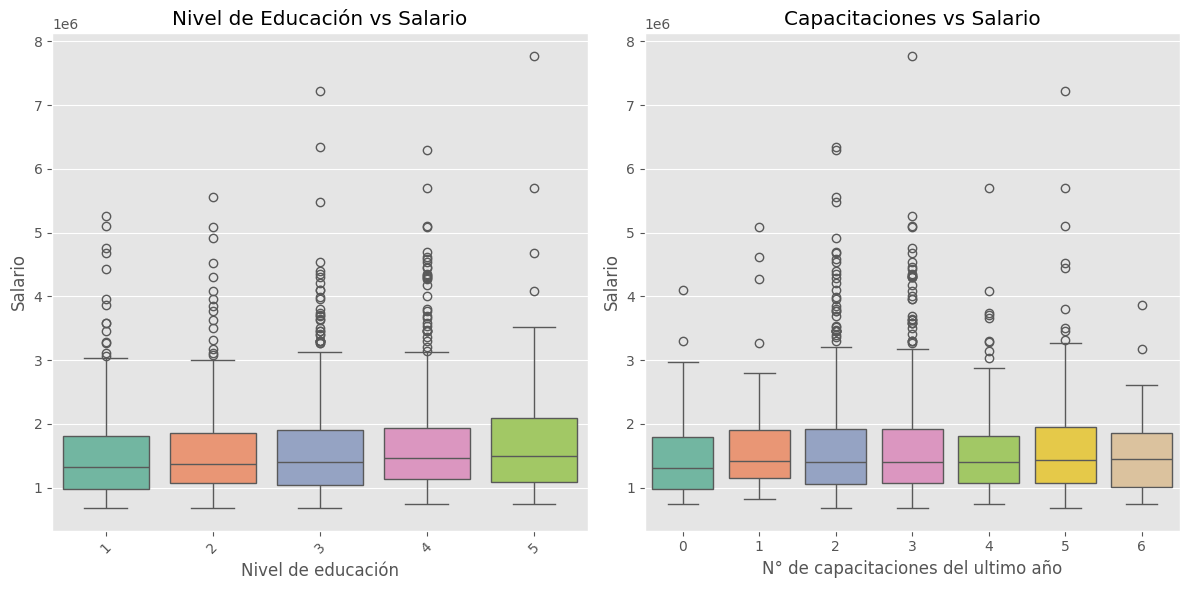

In [29]:
# Impacto de la Educación y la Capacitación
plt.figure(figsize=(12, 6))

# Nivel de educación
plt.subplot(1, 2, 1)
sns.boxplot(x='Nivel de educación', y='Salario', data=dataset, palette='Set2')
plt.title('Nivel de Educación vs Salario')
plt.xticks(rotation=45)

# Número de capacitaciones
plt.subplot(1, 2, 2)
sns.boxplot(x='N° de capacitaciones del ultimo año', y='Salario', data=dataset, palette='Set2')
plt.title('Capacitaciones vs Salario')

plt.tight_layout()
plt.show()

# **Modelado Predictivo**
#### ***Selección y Preparación de Variables***

## ***Metodo de Regresión Lineal Múltiple***
### 1. Modelo de Predicción de Salarios

   - **Seleccionamos variables relevantes** para predecir el salario.
   - **Dividimos el Dataset**: Separamos en conjuntos de entrenamiento y prueba (80/20).
   - **Entrenamos**: un modelo de regresión lineal.
   - **Predecimos y Evaluamos**: Generamos predicciones y evaluamos el modelo utilizando el error cuadrático medio (MSE) y el coeficiente de determinación (R²).


In [30]:
# Seleccionamos variables relevantes para la regresión lineal
X_salary = dataset[['Edad', 'Nivel de educación', 'Antigüedad en la empresa', 'Años en el mismo puesto', 'Satisfacción con el trabajo', 'N° de capacitaciones del ultimo año']]
y_salary = dataset['Salario']

# Dividimos el dataset (80/20)
X_train_salary, X_test_salary, y_train_salary, y_test_salary = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)

# Entrenamos el modelo de Regresión Lineal
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_salary, y_train_salary)

# Predecimos
y_pred_salary = lin_reg_model.predict(X_test_salary)

# Evaluamos el modelo
mse = mean_squared_error(y_test_salary, y_pred_salary)
r2 = r2_score(y_test_salary, y_pred_salary)

print(f"\nError Cuadrático Medio (MSE): {mse:.2f}")
print(f"R²: {r2:.2f}")



Error Cuadrático Medio (MSE): 111298185038.32
R²: 0.86


## ***Metodo de Regresión Logística***
### 2. Modelo de Predicción de Renuncias

   - **Seleccionamos variables relevantes** para predecir si un empleado renunció o no.
   - **Dividimos el Dataset**: Separamos en conjuntos de entrenamiento y prueba (80/20).
   - **Entrenamos**: un modelo de regresión logística.
   - **Predecimos y Evaluamos**: Generamos predicciones y evaluamos el modelo usando la matriz de confusión y un reporte de clasificación.


In [31]:
# Seleccionamos variables relevantes para la regresión logística
X = dataset[['Edad', 'Satisfacción con el trabajo', 'Antigüedad en la empresa', 'Salario', 'N° de capacitaciones del ultimo año']]
y = dataset['Renunció']

# Dividimos el dataset (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo de Regresión Logística
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Predecimos
y_pred_log = log_reg_model.predict(X_test)

# Evaluamos el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_log))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_log))


Matriz de Confusión:
[[  0  39]
 [  0 255]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        39
           2       0.87      1.00      0.93       255

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



# **Implementación de Modelos**

## 1. **División del Dataset**:

   - Cargamos el dataset y separamos las variables para las predicciones de renuncias y salarios.
   - Dividimos ambos conjuntos en entrenamiento y prueba con una proporción del 80/20.


In [32]:
# Dividimos el dataset para predicción de renuncias
X_renuncia = dataset[['Edad', 'Satisfacción con el trabajo', 'Antigüedad en la empresa', 'Salario', 'N° de capacitaciones del ultimo año']]
y_renuncia = dataset['Renunció']

# Dividimos el dataset (80/20)
X_train_renuncia, X_test_renuncia, y_train_renuncia, y_test_renuncia = train_test_split(X_renuncia, y_renuncia, test_size=0.2, random_state=42)

# Dividimos el dataset para predicción de salarios
X_salario = dataset[['Edad', 'Nivel de educación', 'Antigüedad en la empresa', 'Años en el mismo puesto', 'Satisfacción con el trabajo', 'N° de capacitaciones del ultimo año']]
y_salario = dataset['Salario']

# Dividimos el dataset (80/20)
X_train_salario, X_test_salario, y_train_salario, y_test_salario = train_test_split(X_salario, y_salario, test_size=0.2, random_state=42)


## 2. **Entrenamiento**:

   - Entrenamos un modelo de regresión logística para predecir renuncias.
   - Entrenamos un modelo de regresión lineal múltiple para predecir salarios.


In [33]:
# Entrenamiento de Regresión Logística
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_renuncia, y_train_renuncia)

# Entrenamiento de Regresión Lineal Múltiple
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_salario, y_train_salario)


LinearRegression()

## 3. **Validación**:

   - Evaluamos el modelo de regresión logística utilizando una matriz de confusión y un reporte de clasificación.
   - Evaluamos el modelo de regresión lineal utilizando el error cuadrático medio (MSE) y el coeficiente de determinación (R²).


In [35]:
# Validamos el modelo de Regresión Logística
y_pred_renuncia = log_reg_model.predict(X_test_renuncia)

# Evaluamos el modelo de Regresión Logística
print("Matriz de Confusión - Regresión Logística:")
print(confusion_matrix(y_test_renuncia, y_pred_renuncia))

print("\nReporte de Clasificación - Regresión Logística:")
print(classification_report(y_test_renuncia, y_pred_renuncia))

# Validamos el modelo de Regresión Lineal
y_pred_salario = lin_reg_model.predict(X_test_salario)

# Evaluamos el modelo de Regresión Lineal
mse = mean_squared_error(y_test_salario, y_pred_salario)
r2 = r2_score(y_test_salario, y_pred_salario)

print(f"\nError Cuadrático Medio (MSE) - Regresión Lineal: {mse:.2f}")
print(f"R² - Regresión Lineal: {r2:.2f}")


Matriz de Confusión - Regresión Logística:
[[  0  39]
 [  0 255]]

Reporte de Clasificación - Regresión Logística:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        39
           2       0.87      1.00      0.93       255

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294


Error Cuadrático Medio (MSE) - Regresión Lineal: 111298185038.32
R² - Regresión Lineal: 0.86


## 4. **Interpretación de Resultados**:

   - Analizamos la importancia de las variables en ambos modelos, visualizando los coeficientes de las variables para entender su impacto en las predicciones.
   - Esto ayuda a formular estrategias de Recursos Humanos basadas en la influencia de diferentes factores en la retención y compensación.


#### **Regresión Lineal**

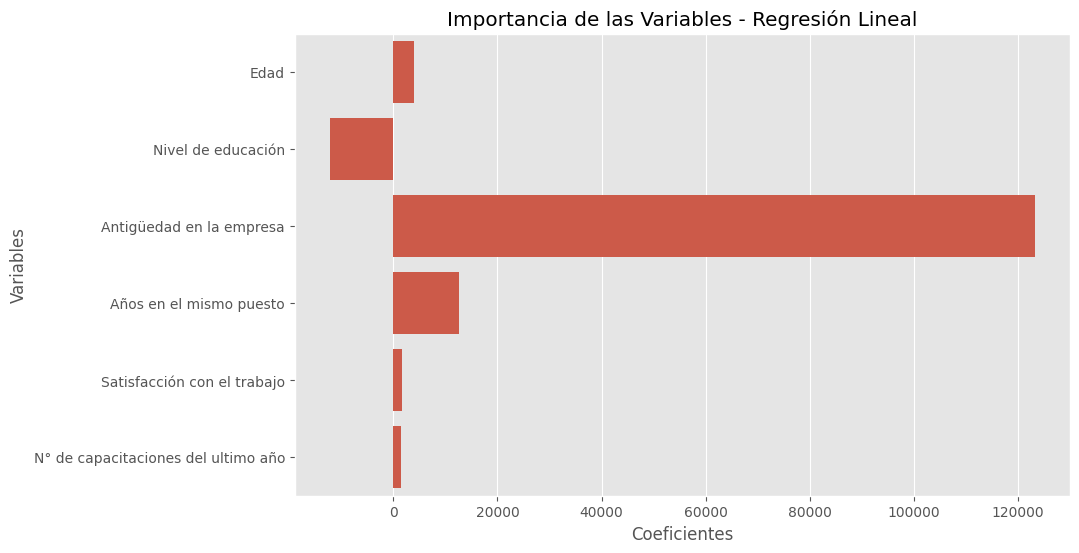

In [36]:
# Importancia de las variables en la regresión lineal
coef_lin_reg = lin_reg_model.coef_
feature_names_salario = X_train_salario.columns

# Visualización de la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_lin_reg, y=feature_names_salario)
plt.title('Importancia de las Variables - Regresión Lineal')
plt.xlabel('Coeficientes')
plt.ylabel('Variables')
plt.show()


#### **Regresión Logística**

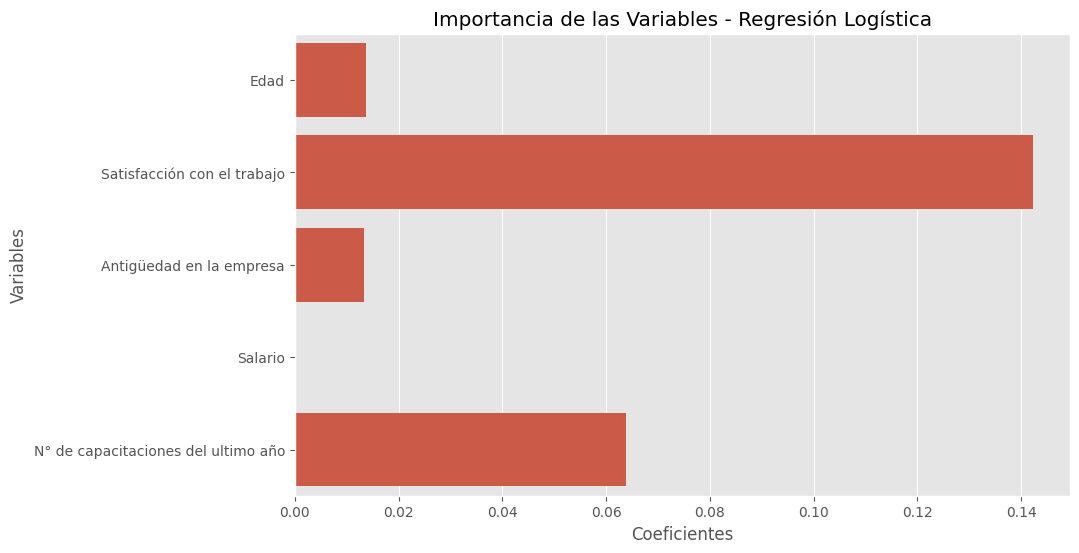

In [37]:
# Importancia de las variables en la regresión logística
coef_log_reg = log_reg_model.coef_[0]
feature_names_renuncia = X_train_renuncia.columns

# Visualización de la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_log_reg, y=feature_names_renuncia)
plt.title('Importancia de las Variables - Regresión Logística')
plt.xlabel('Coeficientes')
plt.ylabel('Variables')
plt.show()


## ***Metodo de Random Forest***

### 1. Modelo de Predicción de Renuncias

   - **Seleccionamos variables relevantes**.
   - **Dividimos el Dataset**: Separamos en conjuntos de entrenamiento y prueba (80/20).
   - **Normalizamos**: Aplicamos escalas estándar a las variables independientes.
   - **Entrenamos**: un modelo de Random Forest.
   - **Predecimos y Evaluamos**: Generamos predicciones y evaluamos el rendimiento mediante la matriz de confusión y el reporte de clasificación.


In [38]:
# Seleccionamos variables relevantes
X = dataset[['Edad', 'Satisfacción con el trabajo', 'Antigüedad en la empresa', 'Salario', 'N° de capacitaciones del ultimo año']]
y = dataset['Renunció']

# Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizamos las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamos el modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecimos
y_pred = model.predict(X_test)

# Evaluamos el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[  4  35]
 [ 15 240]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.21      0.10      0.14        39
           2       0.87      0.94      0.91       255

    accuracy                           0.83       294
   macro avg       0.54      0.52      0.52       294
weighted avg       0.78      0.83      0.80       294



## ***Metodo de Gradient Boosting Regressor***

## 2. **Modelo de Predicción de Salarios**:
   - **Seleccionamos variables relevantes**.
   - **Dividimos el Dataset**: Separamos el dataset en conjuntos de entrenamiento y prueba.
   - **Entrenamos**: un modelo de Gradient Boosting Regressor.
   - **Predecimos y Evaluamos**: evaluamos el rendimiento mediante el error cuadrático medio (MSE) y el coeficiente de determinación (R²).


In [39]:
# Seleccionamos variables relevantes
X_salary = dataset[['Edad', 'Nivel de educación', 'Antigüedad en la empresa', 'Años en el mismo puesto', 'Satisfacción con el trabajo', 'N° de capacitaciones del ultimo año']]
y_salary = dataset['Salario']

# Dividimos el dataset
X_train_salary, X_test_salary, y_train_salary, y_test_salary = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)

# Entrenamos el modelo de Gradient Boosting Regressor
model_salary = GradientBoostingRegressor(random_state=42)
model_salary.fit(X_train_salary, y_train_salary)

# Predecimos
y_pred_salary = model_salary.predict(X_test_salary)

# Evaluamos el modelo
mse = mean_squared_error(y_test_salary, y_pred_salary)
r2 = r2_score(y_test_salary, y_pred_salary)

print(f"\nError Cuadrático Medio (MSE): {mse:.2f}")
print(f"R²: {r2:.2f}")


Error Cuadrático Medio (MSE): 177496690190.01
R²: 0.77


# **Implementación de Modelos**

## 1. **División del Dataset**:

   - Cargamos los datos y Separamos las variables independientes (`X`) de la variable dependiente (`y`).
   - Realizamos la división del dataset en conjuntos de entrenamiento y prueba con una proporción del (80/20).



In [40]:
# Separamos variables para la predicción de renuncias
X = dataset[['Edad', 'Satisfacción con el trabajo', 'Antigüedad en la empresa', 'Salario', 'N° de capacitaciones del ultimo año']]
y = dataset['Renunció']

# Dividimos del dataset (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. **Entrenamiento**:

   -  Ajustamos y entrenamos un modelo de Random Forest con el conjunto de entrenamiento.

In [41]:
# Entrenamos el modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 3. **Validación**:
Probamos los modelos en el conjunto de prueba y ajustamos hiperparámetros según sea necesario.

   - Generamos predicciones sobre el conjunto de prueba.
   - Evaluamos el rendimiento del modelo utilizando la matriz de confusión y un reporte de clasificación, que incluye métricas como precisión, recall y F1-score.


In [42]:
# Predecimos
y_pred = model.predict(X_test)

# Evaluamos el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[  4  35]
 [ 14 241]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.22      0.10      0.14        39
           2       0.87      0.95      0.91       255

    accuracy                           0.83       294
   macro avg       0.55      0.52      0.52       294
weighted avg       0.79      0.83      0.81       294



## 4. **Interpretación de Resultados**:

   - Analizamos y extraemos la importancia de las variables en el modelo y visualizamos con un gráfico de barras, lo que nos permite analizar cuáles de las variables tienen mayor impacto en la predicción de renuncias.
   - Su implicación es crucial para la estrategia de Recursos Humanos, ya que nos ayuda a identificar áreas de enfoque para mejorar la retención de talentos.

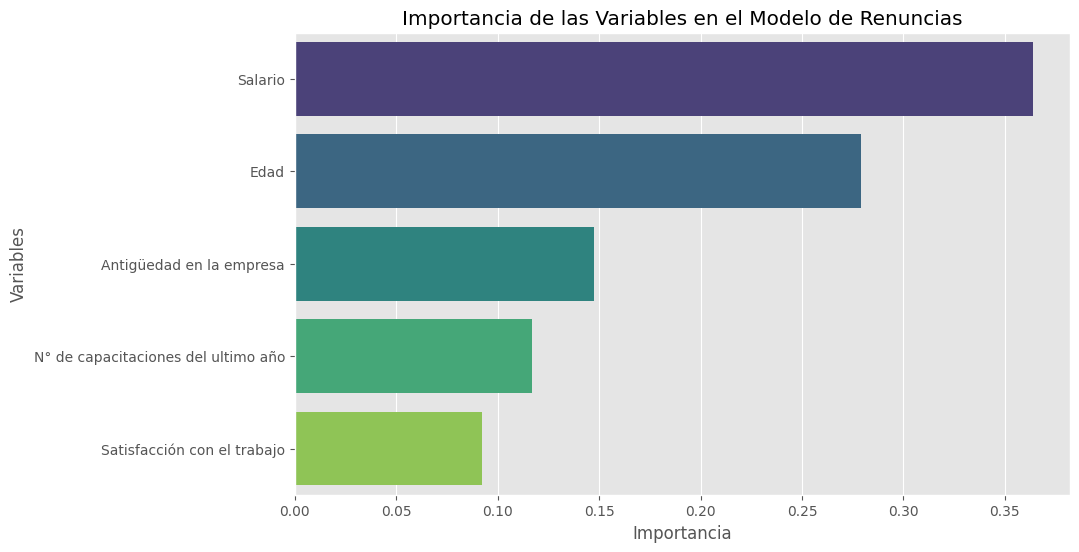

In [43]:
# Importancia de las variables
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualizamos la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title('Importancia de las Variables en el Modelo de Renuncias')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.show()
